In [128]:
import numpy as np
import pandas as pd
import seaborn as sns

import re
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

In [83]:
data = pd.read_csv('bestsellers with categories.csv')

### Справка о данных:

Данные по 50 самым продаваемым книгам Amazon в период с 2009 по 2019 год. Содержит 550 книг, данные были разделены на художественную и научно-популярную литературу с помощью Goodreads.




В качестве целевой переменной выступает Genre.

In [84]:
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


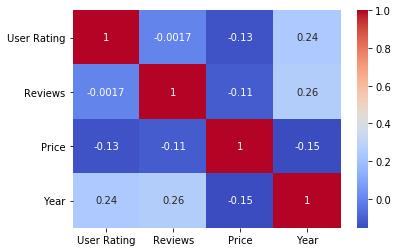

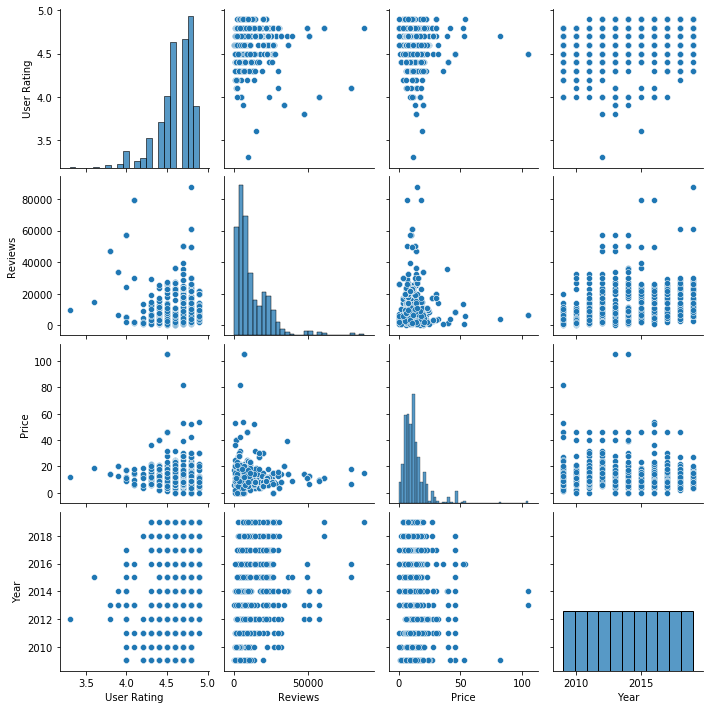

In [86]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
sns.pairplot(data)

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

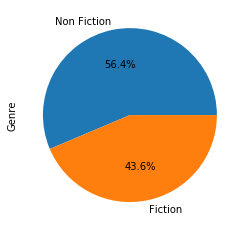

In [87]:
data['Genre'].value_counts().plot.pie(autopct="%.1f%%");
data['Genre'].value_counts()

In [88]:
stop_words = stopwords.words('english')

def preproc(text):
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word not in stop_words])
    return text

In [89]:
Names = data['Name'].apply(preproc)

In [90]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Names)

vlen = len(tokenizer.word_index) + 1

print("Длина словаря:", vlen)

Длина словаря: 1160


In [91]:
Names = tokenizer.texts_to_sequences(Names)

In [92]:
mlength = np.max(list(map(lambda name: len(name), Names)))

print("Наибольшая длина:", max_seq_length)

Наибольшая длина: 20


In [93]:
Names = pad_sequences(Names, maxlen=mlength)
Names

array([[  0,   0,   0, ..., 585, 586, 587],
       [  0,   0,   0, ...,   0,   2,   9],
       [  0,   0,   0, ...,  37, 588, 589],
       ...,
       [  0,   0,   0, ...,  62, 153,   7],
       [  0,   0,   0, ...,  62, 153,   7],
       [  0,   0,   0, ...,  62, 153,   7]])

In [94]:
data['Genre'] = data['Genre'].replace(
    {'Non Fiction': 0, 'Fiction': 1}
)

In [95]:
print("Количество авторов:", len(data['Author'].unique()))

Количество авторов: 248


In [96]:
dummies = pd.get_dummies(data['Author'], prefix='auth')
data = pd.concat([data, dummies], axis=1)
data = data.drop('Author', axis=1)

data

,Name,User Rating,Reviews,Price,Year,Genre,auth_Abraham Verghese,auth_Adam Gasiewski,auth_Adam Mansbach,auth_Adir Levy,...,auth_Todd Burpo,auth_Tony Hsieh,auth_Tucker Carlson,auth_Veronica Roth,auth_W. Cleon Skousen,auth_Walter Isaacson,auth_William Davis,auth_William P. Young,auth_Wizards RPG Team,auth_Zhi Gang Sha
0,10-Day Green Smoothie Cleanse,4.7,17350,8,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11/22/63: A Novel,4.6,2052,22,2011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 Rules for Life: An Antidote to Chaos,4.7,18979,15,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1984 (Signet Classics),4.7,21424,6,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",4.8,7665,12,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9,9413,8,2019,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,You Are a Badass: How to Stop Doubting Your Gr...,4.7,14331,8,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,You Are a Badass: How to Stop Doubting Your Gr...,4.7,14331,8,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,You Are a Badass: How to Stop Doubting Your Gr...,4.7,14331,8,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
data = data.drop('Name', axis=1)

In [98]:
corr = data.corr()

In [105]:
corr[abs(corr['Genre']) < 0.1]['Genre']

Year                    -0.020868
auth_Abraham Verghese    0.068659
auth_Adam Gasiewski     -0.037552
auth_Adam Mansbach       0.048505
auth_Adir Levy           0.048505
                           ...   
auth_Walter Isaacson    -0.065162
auth_William Davis      -0.053156
auth_William P. Young    0.068659
auth_Wizards RPG Team    0.084167
auth_Zhi Gang Sha       -0.053156
Name: Genre, Length: 230, dtype: float64

In [100]:
data = data[corr[abs(corr['Genre']) > 0.1]['Genre'].index]

In [102]:
data

,User Rating,Reviews,Price,Genre,auth_American Psychological Association,auth_Dav Pilkey,auth_Dr. Seuss,auth_E L James,auth_Eric Carle,auth_Gallup,...,auth_J.K. Rowling,auth_Jeff Kinney,auth_John Green,auth_John Grisham,auth_R. J. Palacio,auth_Rick Riordan,auth_Rob Elliott,auth_Stephenie Meyer,auth_Stieg Larsson,auth_Suzanne Collins
0,11,17350,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,2052,22,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,18979,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,21424,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,7665,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,13,9413,8,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
546,11,14331,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,11,14331,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,11,14331,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

LE.fit(data['User Rating'])
data['User Rating']=LE.transform(data['User Rating'])

data.head()

,User Rating,Reviews,Price,Genre,auth_American Psychological Association,auth_Dav Pilkey,auth_Dr. Seuss,auth_E L James,auth_Eric Carle,auth_Gallup,...,auth_J.K. Rowling,auth_Jeff Kinney,auth_John Green,auth_John Grisham,auth_R. J. Palacio,auth_Rick Riordan,auth_Rob Elliott,auth_Stephenie Meyer,auth_Stieg Larsson,auth_Suzanne Collins
0,11,17350,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,2052,22,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,18979,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,21424,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,7665,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y = data['Genre'].copy()
X = data.drop('Genre', axis=1).copy()

In [135]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:

Models = {
    
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0),
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier()
    
}

In [138]:
for n, m in Models.items():
    m.fit(X_train, y_train)
    print(n + " trained")

                         Random Forest trained
                     Gradient Boosting trained
                               XGBoost trained
                              LightGBM trained
                              CatBoost trained
                   Logistic Regression trained
                         Decision Tree trained


In [141]:
for n, m in Models.items():
    print(n + '  Accuracy' ": {:1.2f}%".format(m.score(X_test, y_test) * 100))

                         Random Forest  Accuracy: 83.03%
                     Gradient Boosting  Accuracy: 80.61%
                               XGBoost  Accuracy: 83.03%
                              LightGBM  Accuracy: 78.79%
                              CatBoost  Accuracy: 82.42%
                   Logistic Regression  Accuracy: 80.00%
                         Decision Tree  Accuracy: 83.03%
